In [19]:
%load_ext autoreload
%autoreload 2

import numpy as np
from models.rw_model import RWModel, calc_values_for_rw_model
from model_fit_utils import fit_rw_model, calc_rw_value_mse
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Test RW-model values look reasonable

In [20]:
stimuli_idxs = np.array([0, 2, 2, 0])
rewards = np.array([-3, 0, -3, -3])

model = calc_values_for_rw_model(alpha=0.2, stimuli_idxs=stimuli_idxs, rewards=rewards)

In [21]:
model.values

array([[ 0.  ,  0.  ,  0.  ],
       [-0.6 ,  0.  ,  0.  ],
       [-0.6 ,  0.  ,  0.  ],
       [-0.6 ,  0.  , -0.6 ],
       [-1.08,  0.  , -0.6 ]])

### Test RW Model Fitting recovers learning rate

In [22]:
# create random stimuli and rewards for 100 trials
rng = np.random.default_rng(10)
stimuli_idxs = rng.choice([0, 1, 2], 100)
rewards = rng.choice([-3, 0], 100)

# set ground truth alpha, this is what we'll try to recover
alpha = 0.2

# make a ground truth model
ground_truth_model = calc_values_for_rw_model(alpha=alpha, stimuli_idxs=stimuli_idxs, rewards=rewards)

In [24]:
# use values from ground truth model as behavioral response we'll try to fit on
trial_vals = ground_truth_model.values[:-1, :]
behavior = trial_vals[np.arange(len(trial_vals)), stimuli_idxs]

In [25]:
# fit model with initial guess of 0.5
res = fit_rw_model(calc_rw_value_mse, stimuli_idxs, rewards, behavior, 0.5)

In [26]:
# show that learning rate gets recovered from model fitting (x param)
res

 final_simplex: (array([[0.2       ],
       [0.20009766]]), array([3.96132975e-31, 4.42654644e-08]))
           fun: 3.9613297468134425e-31
       message: 'Optimization terminated successfully.'
          nfev: 28
           nit: 14
        status: 0
       success: True
             x: array([0.2])

### Generate plot with alpha = 0.7

Text(0.5, 0, 'Trials')

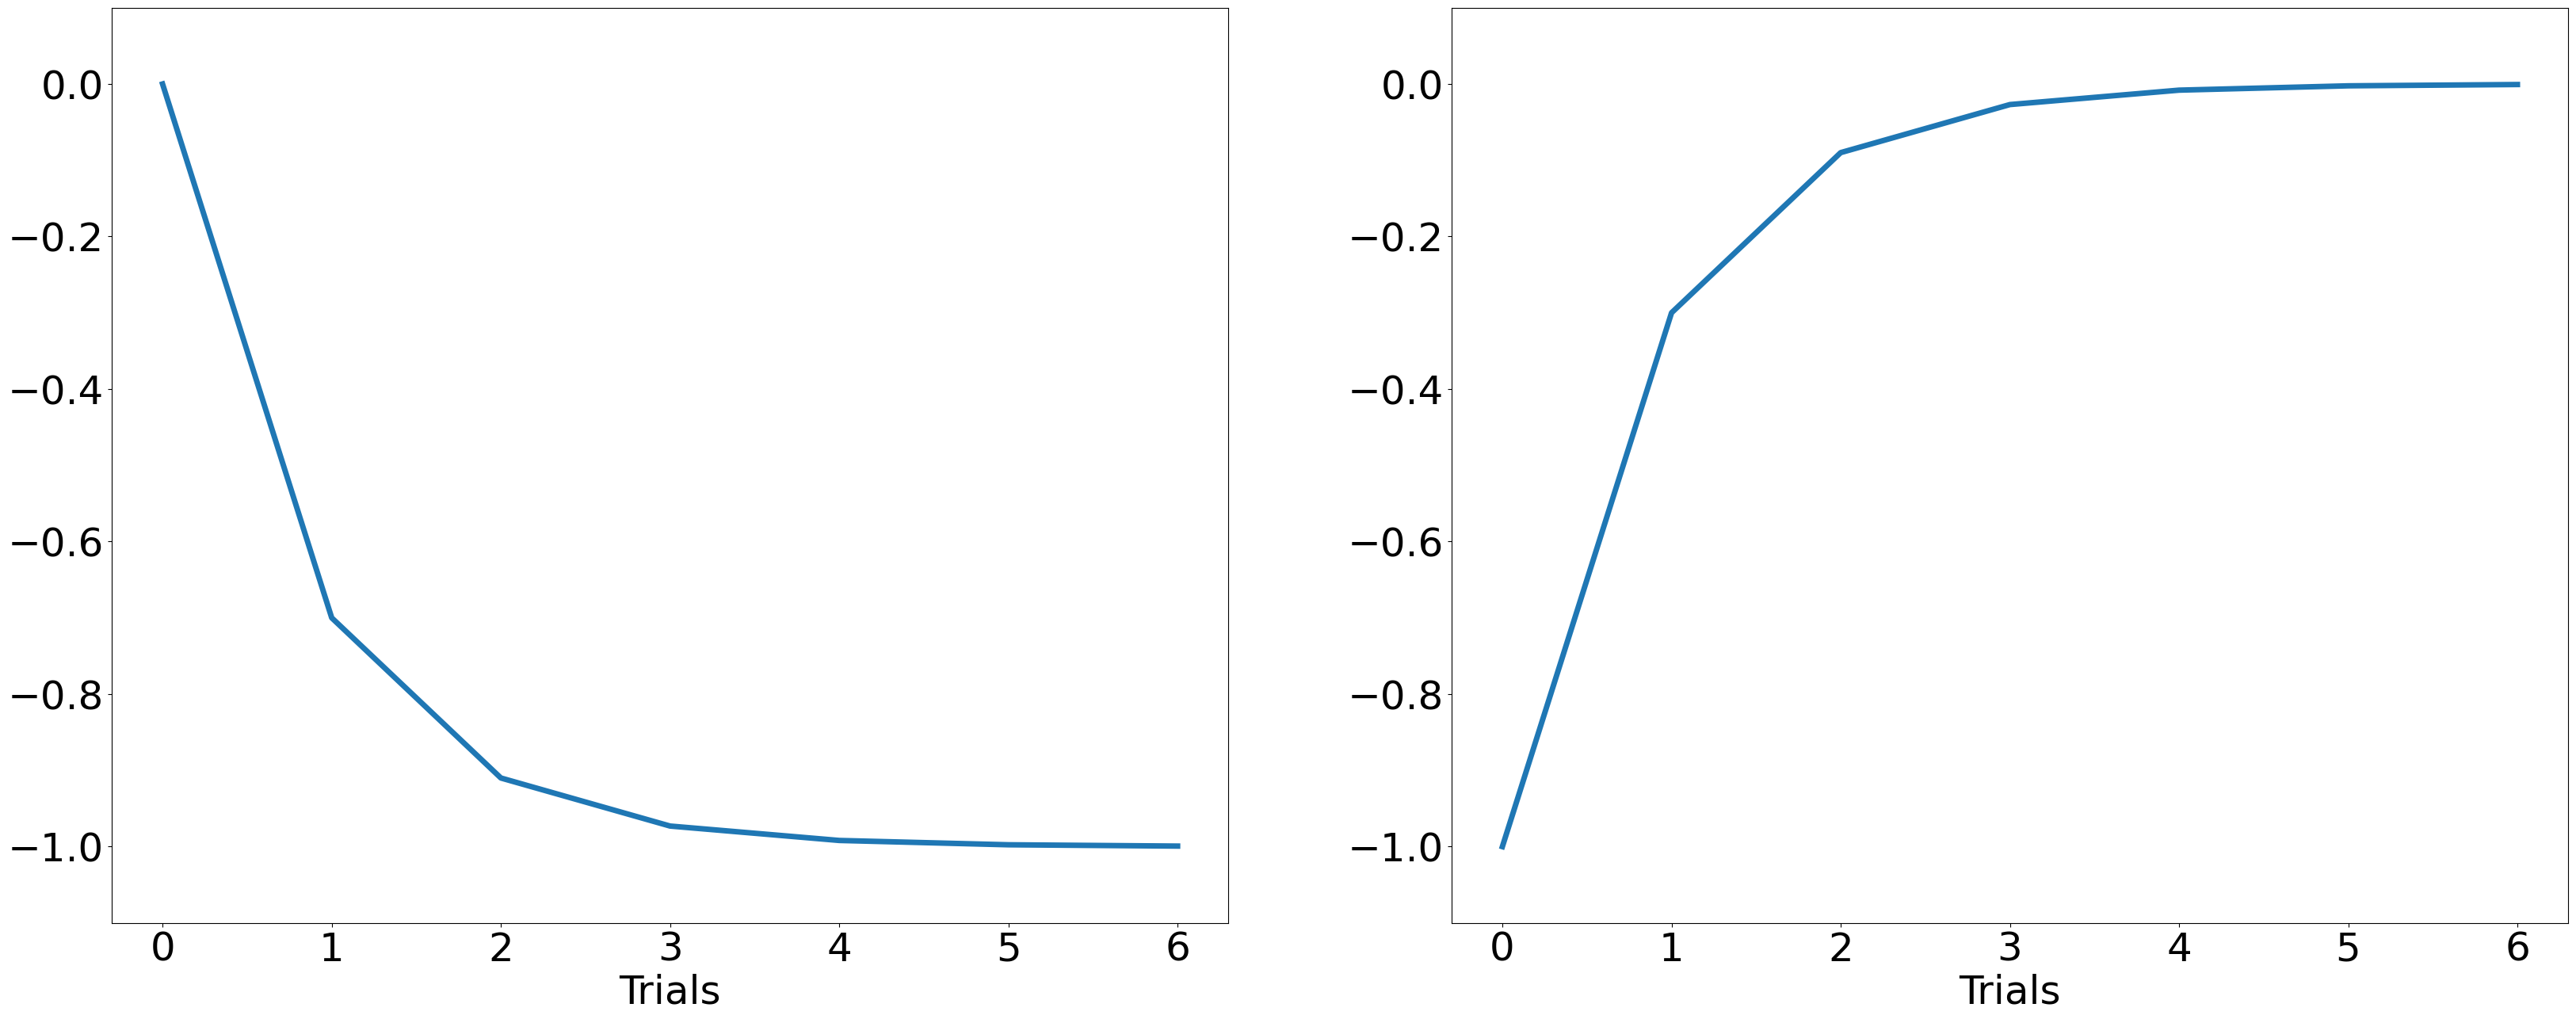

In [18]:
stimuli_idxs = np.zeros(20).astype(int)
rewards = np.ones(20) * -1
model = calc_values_for_rw_model(alpha=0.7, stimuli_idxs=stimuli_idxs, rewards=rewards)
plt.rcParams.update({'font.size': 36})
fig, ax = plt.subplots(1, 2, figsize=(40, 15), sharex=True)
ax[0].plot(model.values[:7, 0], linewidth=5)
ax[0].set_ylim((-1.1, 0.1))
ax[0].set_xlabel("Trials")
ax[1].plot(model.rpes[:7, 0], linewidth=5)
ax[1].set_ylim((-1.1, 0.1))
ax[1].set_xlabel("Trials")

